In [20]:
# Pandas and numpy for data manipulation
import os
import pandas as pd
import numpy as np
np.random.seed (42)

In [23]:
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt 
%matplotlib inline
import matplotlib
matplotlib.rcParams ['font.size'] = 16
matplotlib.rcParams ['figure.figsize'] = (9, 9)

In [24]:
import seaborn as sns
from IPython.core.pylabtools import figsize
# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats

In [27]:
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
# Splitting data into training / testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
# Distributions
import scipy

In [28]:
# PyMC3 for Bayesian Inference
import pymc3 as pm

In [42]:
# Read dataset
def load_data ():
    csv_path = os.path.join("C:\\Users\\eshpe\\Desktop\\ML Assignments\\student-mat.csv")
    return pd. read_csv(csv_path)
df = load_data ()
# Filter out grades that were 0
df = df[~df['Grade'].isin ([0, 1])]
df.head ()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


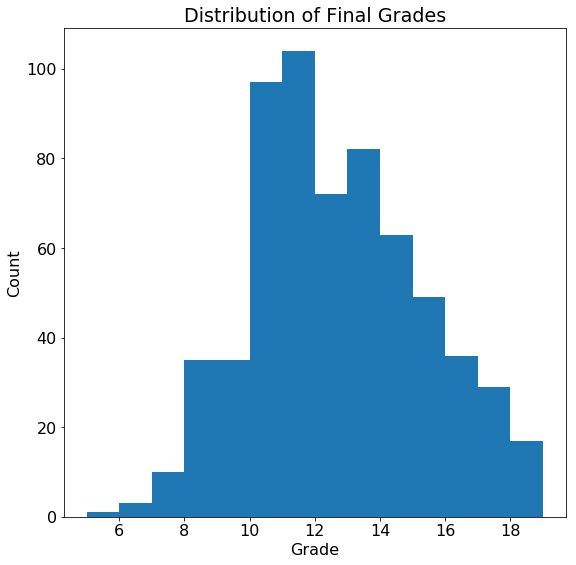

In [44]:
import matplotlib . pyplot as plt
# Histogram of grades
plt.hist (df['Grade'], bins = 14)
plt.xlabel ('Grade')
plt.ylabel ('Count')
plt.title ('Distribution of Final Grades')
plt.show ()

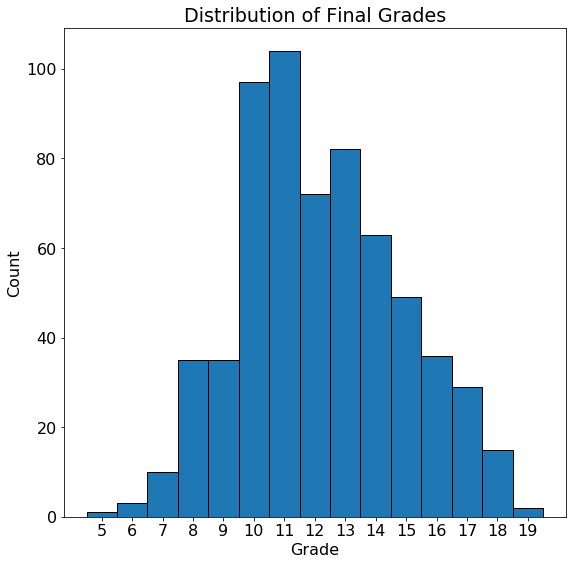

In [46]:
# Bar plot of grades
plt .bar (df['Grade'].value_counts ().index ,
            df['Grade'].value_counts ().values ,
                fill = 'navy',edgecolor = 'k', width = 1)
plt.xlabel ('Grade');
plt.ylabel ('Count');
plt.title ('Distribution of Final Grades');
plt.xticks (list ( range (5, 20)));

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecat

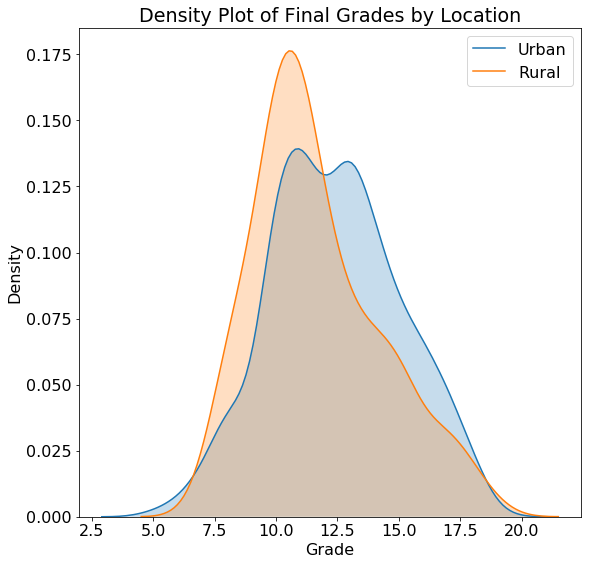

In [47]:
# Grade distribution by address
sns.kdeplot (df.ix[df['address'] == 'U', 'Grade'], label = 'Urban',shade = True)
sns.kdeplot (df.ix[df['address'] == 'R', 'Grade'], label = 'Rural',shade = True)
plt.xlabel ('Grade');
plt.ylabel ('Density');
plt.title ('Density Plot of Final Grades by Location');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecat

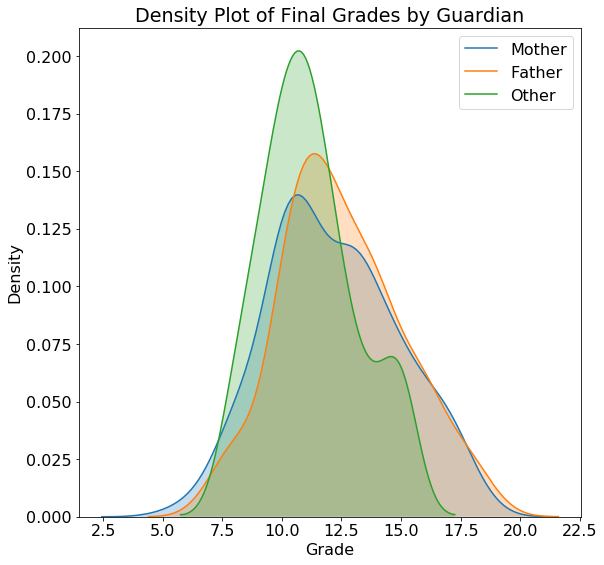

In [61]:
# Grade distribution by Guardian
sns.kdeplot (df.ix[df['guardian'] == 'mother', 'Grade'], label = 'Mother',shade = True)
sns.kdeplot (df.ix[df['guardian'] == 'father', 'Grade'], label = 'Father',shade = True)
sns.kdeplot (df.ix[df['guardian'] == 'other', 'Grade'], label = 'Other',shade = True)
plt.xlabel ('Grade');
plt.ylabel ('Density');
plt.title ('Density Plot of Final Grades by Guardian');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecat

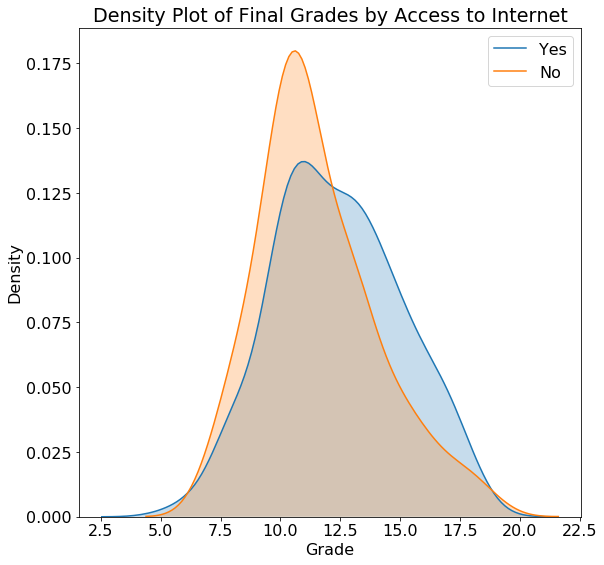

In [62]:
# Grade distribution by Internet Access
sns.kdeplot (df.ix[df['internet'] == 'yes', 'Grade'], label = 'Yes',shade = True)
sns.kdeplot (df.ix[df['internet'] == 'no', 'Grade'], label = 'No',shade = True)
plt.xlabel ('Grade');
plt.ylabel ('Density');
plt.title ('Density Plot of Final Grades by Access to Internet');

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecat

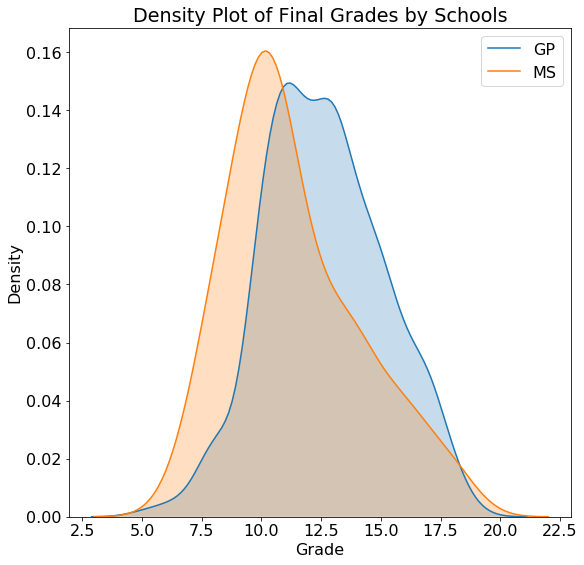

In [60]:
# Grade distribution by Schools
sns.kdeplot (df.ix[df['school'] == 'GP', 'Grade'], label = 'GP',shade = True)
sns.kdeplot (df.ix[df['school'] == 'MS', 'Grade'], label = 'MS',shade = True)
plt.xlabel ('Grade');
plt.ylabel ('Density');
plt.title ('Density Plot of Final Grades by Schools');

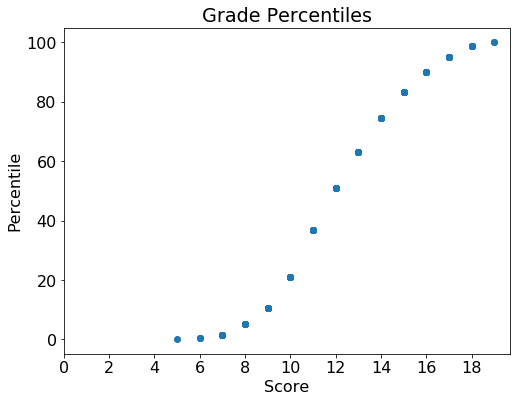

In [73]:
# Calculate percentile for grades
df['percentile'] = df['Grade'].apply (lambda x: percentileofscore (df['Grade'], x))

# Plot percentiles for grades
plt.figure ( figsize = (8, 6))
plt.plot (df['Grade'], df['percentile'], 'o')
plt.xticks ( range (0, 20 , 2), range (0, 20 , 2))
plt.xlabel ('Score');
plt.ylabel ('Percentile');
plt.title ('Grade Percentiles');

In [75]:
# Find correlations and sort
df.corr ()['Grade'].sort_values ()

failures      -0.384569
absences      -0.204230
Dalc          -0.196891
Walc          -0.178839
traveltime    -0.129654
goout         -0.111228
freetime      -0.105206
health        -0.096461
age           -0.042505
famrel         0.072888
Fedu           0.204392
studytime      0.249855
Medu           0.278690
G1             0.874777
G2             0.942691
percentile     0.985253
percentile     0.985253
Grade          1.000000
Name: Grade, dtype: float64

In [76]:
# Select only categorical variables
category_df = df.select_dtypes ( include = ['object'])
# One hot encode the variables
dummy_df = pd. get_dummies ( category_df )
# Put the grade back in the dataframe
dummy_df ['Grade'] = df['Grade']
dummy_df.head ()

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,Grade
0,1,0,1,0,0,1,1,0,1,0,...,0,0,1,0,1,1,0,1,0,11
1,1,0,1,0,0,1,1,0,0,1,...,0,1,0,0,1,0,1,1,0,11
2,1,0,1,0,0,1,0,1,0,1,...,0,0,1,0,1,0,1,1,0,12
3,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,1,0,1,0,1,14
4,1,0,1,0,0,1,1,0,0,1,...,0,0,1,0,1,1,0,1,0,13


In [77]:
# Correlations in one -hot encoded dataframe
dummy_df . corr ()['Grade']. sort_values ()

higher_no           -0.343742
school_MS           -0.227632
Mjob_at_home        -0.158496
reason_course       -0.138195
internet_no         -0.131408
address_R           -0.128350
sex_M               -0.125755
guardian_other      -0.100802
schoolsup_yes       -0.098185
reason_other        -0.092382
activities_no       -0.078526
paid_yes            -0.067146
nursery_no          -0.056449
romantic_yes        -0.052050
Fjob_at_home        -0.049372
Fjob_services       -0.042497
Mjob_other          -0.035494
Fjob_other          -0.021292
famsize_GT3         -0.012957
guardian_mother     -0.008042
Pstatus_T           -0.001776
famsup_no           -0.001581
famsup_yes           0.001581
Pstatus_A            0.001776
Mjob_services        0.006210
famsize_LE3          0.012957
Fjob_health          0.026320
reason_home          0.046639
romantic_no          0.052050
nursery_yes          0.056449
guardian_father      0.066486
paid_no              0.067146
activities_yes       0.078526
Mjob_healt

In [89]:
# Takes in a dataframe , finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data (df):
    # Targets are final grade of student
    labels = df['Grade']
    # Drop the school and the grades from features
    df = df.drop (['school', 'G1', 'G2', 'percentile'], axis =1)
    # One -Hot Encoding of Categorical Variables
    df = pd.get_dummies (df)
    # Find correlations with the Grade
    most_correlated = df.corr ().abs ()['Grade']. sort_values (ascending = False)
    # Maintain the top 5 most correlation features with Grade
    most_correlated = most_correlated [:8]
    df = df.ix[:, most_correlated . index ]
    df = df. drop ('higher_no', axis =1)
    # Split into training / testing sets with 25% split
    X_train , X_test , y_train , y_test = train_test_split (df , labels , test_size = 0.25 , random_state = 42)
    return X_train, X_test, y_train, y_test


In [90]:
    X_train, X_test, y_train, y_test = format_data (df)
    X_train.head ()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Grade,percentile,failures,higher_yes,Medu,studytime,Fedu
619,13,62.954186,0,1,3,2,3
323,10,21.011058,0,1,4,1,3
201,16,89.968404,0,1,2,2,1
410,17,95.102686,0,1,2,2,2
426,11,36.887836,0,1,3,1,3


In [91]:
    X_train, X_test, y_train, y_test = format_data (df)
    X_test.head ()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,Grade,percentile,failures,higher_yes,Medu,studytime,Fedu
331,12,50.789889,0,1,1,2,1
249,12,50.789889,0,1,3,3,2
392,15,83.254344,0,1,3,2,2
145,10,21.011058,0,1,3,1,3
500,7,1.500790,1,0,1,1,2


In [93]:
    X_train, X_test, y_train, y_test = format_data (df)
    y_train.head ()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


619    13
323    10
201    16
410    17
426    11
Name: Grade, dtype: int64

In [94]:
    X_train, X_test, y_train, y_test = format_data (df)
    y_test.head ()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


331    12
249    12
392    15
145    10
500     7
Name: Grade, dtype: int64

In [97]:
#Rename variables in train and teste
X_train = X_train . rename ( columns ={'higher_yes': 'higher_edu', 'Medu': 'mother_edu', 'Fedu': 'father_edu'})
X_test = X_test . rename ( columns ={'higher_yes': 'higher_edu', 'Medu': 'mother_edu', 'Fedu ': 'father_edu'})

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1540: UserWarning: Warni

ValueError: Format specifier missing precision

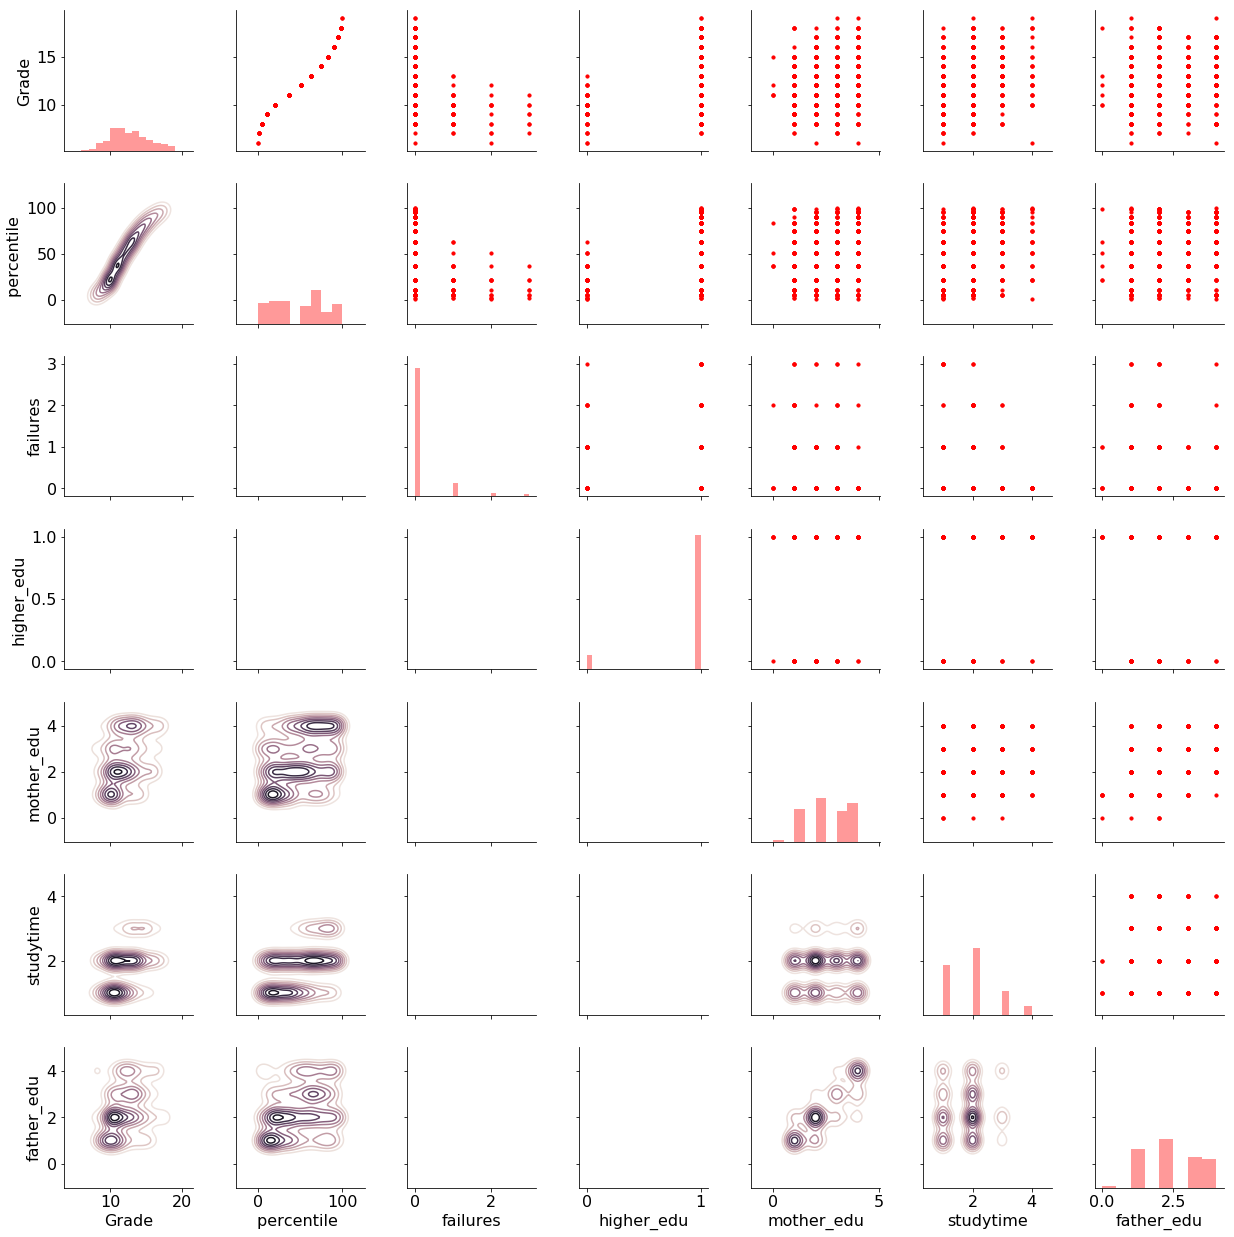

In [98]:
# Calculate correlation coefficient
def corrfunc (x, y, ** kws):
    r, _ = stats.pearsonr (x, y)
    ax = plt .gca ()
    ax.annotate ("r = {:. 2f}". format (r), xy=(.1, .6), xycoords =ax. transAxes , size = 24)
    
cmap = sns . cubehelix_palette ( light =1, dark = 0.1, hue = 0.5, as_cmap = True )
    
sns.set_context (font_scale =2)
# Pair grid set up
g = sns.PairGrid ( X_train )
# Scatter plot on the upper triangle
g.map_upper (plt. scatter , s=10 , color = 'red')
# Distribution on the diagonal
g. map_diag (sns. distplot , kde=False , color = 'red')
# Density Plot and Correlation coefficients on the lower triangle
g.map_lower (sns. kdeplot , cmap = cmap )
g.map_lower ( corrfunc );

In [99]:
# Create relation to the median grade column
X_plot = X_train.copy ()
X_plot ['relation_median'] = ( X_plot ['Grade'] >= 12)
X_plot ['relation_median'] = X_plot ['relation_median']. replace ({ True : 'above', False : 'below'})
X_plot = X_plot.drop ('Grade', axis =1)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


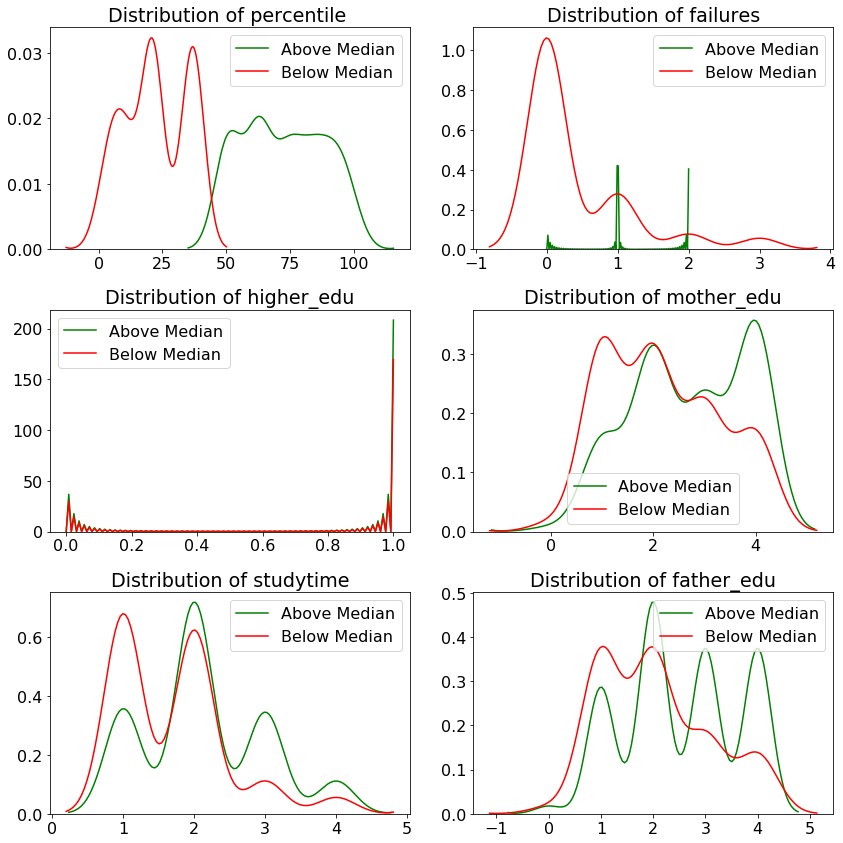

In [101]:
plt.figure (figsize =(12 , 12))
# Plot the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate ( X_plot . columns [:-1]):
    plt.subplot (3, 2, i + 1)
    subset_above = X_plot [ X_plot ['relation_median'] == 'above']
    subset_below = X_plot [ X_plot ['relation_median'] == 'below']
    sns.kdeplot ( subset_above [col], label = 'Above Median', color = 'green')
    sns.kdeplot ( subset_below [col], label = 'Below Median', color = 'red')
    plt.legend (); plt.title ('Distribution of %s' % col)
plt . tight_layout ()

In [103]:
# Calculate mae and rmse
def evaluate_predictions (predictions , true ):
    mae = np. mean (abs( predictions - true ))
    rmse = np. sqrt (np. mean (( predictions - true ) ** 2))
    return mae , rmse

In [104]:
# Naive baseline is the median
median_pred = X_train ['Grade']. median ()
median_preds = [ median_pred for _ in range (len ( X_test ))]
true = X_test ['Grade']

In [113]:
# Display the naive baseline metrics
mb_mae,mb_rmse = evaluate_predictions (median_preds,true)
print (mb_mae)
print (mb_rmse)

2.1761006289308176
2.6776503357897044


In [130]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate ( X_train , X_test , y_train , y_test ):
    
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression','Random Forest', 'Extra Trees', 'SVM','Gradient Boosted', 'Baseline']
    X_train = X_train.drop ( columns ='Grade')
    X_test = X_test.drop ( columns ='Grade')
    
    # Instantiate the models
    model1 = LinearRegression ()
    model2 = ElasticNet ( alpha =1.0, l1_ratio =0.5)
    model3 = RandomForestRegressor ( n_estimators =50)
    model4 = ExtraTreesRegressor ( n_estimators =50)
    model5 = SVR ( kernel ='rbf', degree =3, C=1.0, gamma ='auto')
    model6 = GradientBoostingRegressor (n_estimators =20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae','rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate ([model1,model2,model3,model4,model5,model6]):
        model.fit( X_train,y_train)
        predictions = model.predict (X_test)
        
        # Metrics
        mae = np.mean (abs(predictions - y_test))
        rmse = np.sqrt (np. mean ((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list [i]
        results.ix[ model_name, :] = [mae , rmse ]
    
    # Median Value Baseline Metrics
    baseline = np.median (y_train)
    baseline_mae = np.mean (abs (baseline - y_test))
    baseline_rmse = np.sqrt (np. mean ((baseline - y_test) ** 2))
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    return results

In [132]:
results = evaluate ( X_train , X_test , y_train , y_test )

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: 
.ix is deprecated. Please

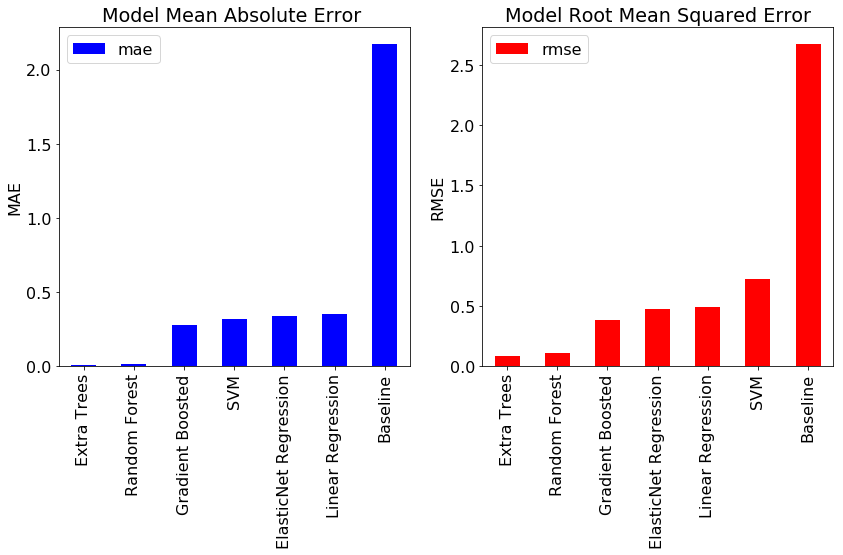

In [134]:
figsize (12,8)
matplotlib . rcParams ['font.size'] = 16

# Root mean squared error
ax = plt.subplot (1, 2, 1)
results.sort_values ('mae', ascending = True ). plot.bar(y = 'mae', color='b', ax = ax)
plt.title ('Model Mean Absolute Error '); plt.ylabel ('MAE');

# Median absolute percentage error
ax = plt.subplot (1, 2, 2)
results . sort_values ('rmse', ascending = True ). plot .bar(y = 'rmse',color = 'r', ax = ax)
plt.title ('Model Root Mean Squared Error'); plt. ylabel ('RMSE');
plt.tight_layout ()

In [135]:
results

,mae,rmse
Linear Regression,0.354316,0.488203
ElasticNet Regression,0.340612,0.471816
Random Forest,0.0124528,0.111649
Extra Trees,0.00955975,0.0818343
SVM,0.321774,0.722182
Gradient Boosted,0.279416,0.38178
Baseline,2.1761,2.67765


In [137]:
print ('The Linear Regression is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['Linear Regression', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The Linear Regression is 83.72% better than the baseline.


In [138]:
print ('The ElasticNet Regression is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['ElasticNet Regression', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The ElasticNet Regression is 84.35% better than the baseline.


In [139]:
print ('The Random Forest is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['Random Forest', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The Random Forest is 99.43% better than the baseline.


In [140]:
print ('The Extra Trees is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['Extra Trees', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The Extra Trees is 99.56% better than the baseline.


In [141]:
print ('The SVM is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['SVM', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The SVM is 85.21% better than the baseline.


In [142]:
print ('The Gradient Boosted is {:0.2f}% better than the baseline.'.format ((100 * abs(results.loc['Gradient Boosted', 'mae'] - results.loc['Baseline', 'mae'])) /results.loc ['Baseline', 'mae']))

The Gradient Boosted is 87.16% better than the baseline.


In [160]:
# The OLS Linear Regression
lr = LinearRegression()
lr.fit (X_train.drop(columns ='Grade'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_

for i, col in enumerate (X_train.columns [1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_ [i], col)

' '. join (ols_formula.split (' ')[:-1])

'Grade = 7.78 + 0.09 * percentile  + 0.02 * failures + -0.04 * higher_edu + 0.03 * mother_edu + -0.00 * studytime + -0.08 * father_edu'

In [165]:
# Formula for Bayesian Linear Regression ( follows R formula syntax
formula = 'Grade ~ ' + ' + '. join (['%s' % variable for variable in X_train.columns [1:]])
formula

'Grade ~ percentile  + failures + higher_edu + mother_edu + studytime + father_edu'

In [162]:
# Context for the model
with pm.Model () as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally  a  family )
    pm.GLM.from_formula (formula, data = X_train,family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample (draws =2000,chains = 2,tune=500,njobs =-1)

PatsyError: Error evaluating factor: NameError: name 'percentile' is not defined
    Grade ~ percentile  + failures + higher_edu + mother_edu + studytime + father_edu
            ^^^^^^^^^^